# Motivação e Objetivo

O Transtorno do Espectro Autista é um transtorno neurodesenvolvimental que afeta principalmente a comunicação e o comportamento social. Embora seja diagnosticado geralmente na infância, o diagnóstico tardio ou a falta de diagnóstico pode levar a cuidados inadequados e à marginalização do indivíduo.

A motivação do projeto é, a partir do desenvolvimento de um modelo de aprendizado de máquina baseado nos resultados do questionário AQ-10 e outras informações demográficas, ajudar na identificação e no diagnóstico de TEA em adultos, proporcionando suporte a profissionais de saúde. Nosso objetivo principal é identificar o quanto cada uma das perguntas do questionário impacta no futuro diagnóstico (ou auxência dele).

Para visualizar o questionário AQ-10 [acesse aqui](https://github.com/carinalanchine/machine-learning-saude/blob/main/Projeto%20de%20aplica%C3%A7%C3%A3o/AQ10.pdf).

# Descrição do Dataset

O dataset foi extraído do Autism Diagnosis Challenge no Kaggle e contém informações detalhadas sobre participantes que foram avaliados usando o questionário AQ-10.

Os dados incluem alguns dados pessoais dos participantes, as respostas de cada um para as perguntas do    AQ-10, e a pontuação total no AQ-10, além de uma coluna indicando se o indivíduo foi diagnosticado formalmente com autismo ou não.

O dataset inclui 704 amostras, com variáveis tanto categóricas quanto numéricas.

[Fonte do dataset](https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults/data).

### Adicionando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc


### Importando os dados

In [3]:
dataset = pd.read_csv('./autism_screening.csv')
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


### Fazendo uma análise inicial do dataset

In [4]:
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


### Removendo e renomeando colunas conforme necessário

In [5]:
dataset = dataset.drop(columns =['ethnicity', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'result'])
dataset = dataset.rename(columns={'austim': 'autism_history',  'Class/ASD': 'autism', 'A1_Score': 'A01', 'A2_Score': 'A02', 'A3_Score': 'A03', 'A4_Score': 'A04', 'A5_Score': 'A05', 'A6_Score': 'A06', 'A7_Score': 'A07', 'A8_Score': 'A08', 'A9_Score': 'A09', 'A10_Score': 'A10'})
dataset.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,age,gender,jundice,autism_history,autism
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,NO


### Analisando os valores únicos de cada coluna

In [6]:
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A01: [1 0]
A02: [1 0]
A03: [1 0]
A04: [1 0]
A05: [0 1]
A06: [0 1]
A07: [1 0]
A08: [1 0]
A09: [0 1]
A10: [0 1]
age: [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
gender: ['f' 'm']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


### Removendo colunas com NaN e analisando os novos dados

In [7]:
dataset = dataset.replace(383., np.nan)
dataset = dataset.dropna()

for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A01: [1 0]
A02: [1 0]
A03: [1 0]
A04: [1 0]
A05: [0 1]
A06: [0 1]
A07: [1 0]
A08: [1 0]
A09: [0 1]
A10: [0 1]
age: [26. 24. 27. 35. 40. 36. 17. 64. 29. 33. 18. 31. 30. 34. 38. 42. 43. 48.
 37. 55. 50. 53. 20. 28. 21. 47. 32. 44. 19. 58. 45. 22. 39. 25. 23. 54.
 60. 41. 46. 56. 61. 59. 52. 49. 51.]
gender: ['f' 'm']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


### Analisando o tipo dos dados

In [8]:
print(dataset.dtypes)

A01                 int64
A02                 int64
A03                 int64
A04                 int64
A05                 int64
A06                 int64
A07                 int64
A08                 int64
A09                 int64
A10                 int64
age               float64
gender             object
jundice            object
autism_history     object
autism             object
dtype: object


### Convertendo float64 para int64

In [9]:
dataset['age'] = dataset['age'].astype('int64')
print(dataset.dtypes)

A01                int64
A02                int64
A03                int64
A04                int64
A05                int64
A06                int64
A07                int64
A08                int64
A09                int64
A10                int64
age                int64
gender            object
jundice           object
autism_history    object
autism            object
dtype: object


### Fazendo label encoding nas colunas

In [10]:
label_encoder = LabelEncoder()
dataset[['autism', 'autism_history', 'gender', 'jundice']] = dataset[['autism', 'autism_history', 'gender', 'jundice']].apply(label_encoder.fit_transform)
dataset = dataset.rename(columns={'gender': 'gênero', 'age': 'idade', 'autism_history': 'histórico_familiar', 'jundice': 'icterícia'})
dataset.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,idade,gênero,icterícia,histórico_familiar,autism
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,0


### Tratamento dos dados (X)

In [11]:
X = dataset.drop(columns=['autism'])
X.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,idade,gênero,icterícia,histórico_familiar
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0


### Tratamento da classe (y)

In [12]:
y = dataset['autism']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: autism, dtype: int64

A01                   0.296792
A02                   0.311637
A03                   0.439832
A04                   0.468729
A05                   0.537714
A06                   0.591424
A07                   0.351969
A08                   0.234749
A09                   0.634931
A10                   0.385902
idade                 0.132279
gênero               -0.081597
icterícia             0.101400
histórico_familiar    0.176611
dtype: float64


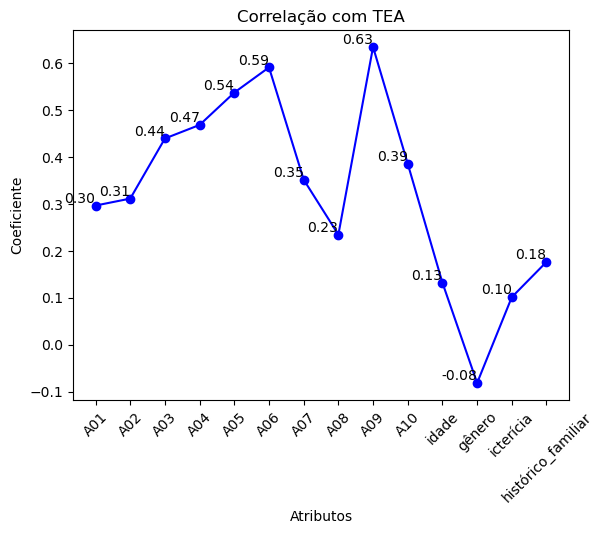

In [13]:
# Coeficiente de correlação de Pearson
correlacoes = X.corrwith(y)
print(correlacoes)

# Criar o gráfico de linha
plt.plot(correlacoes.index, correlacoes.values, marker='o', linestyle='-', color='b', )

for i, txt in enumerate(correlacoes.values):
  plt.text(correlacoes.index[i], correlacoes.values[i], f'{txt:.2f}', ha='right', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.xlabel('Atributos')
plt.ylabel('Coeficiente')
plt.title('Correlação com TEA')
plt.show()

In [14]:
# Balanceamento dos dados
print(y.value_counts())

autism
0    512
1    189
Name: count, dtype: int64


### Dividindo os dados em conjuntos de treinamento e teste 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = y.values.ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Treinamento dos modelos

### Árvore de Decisão

In [16]:
# Otimizando os hiperparâmetros
peso_classe_0 = len(y_train) / sum(y_train == 0)
peso_classe_1 = len(y_train) / sum(y_train == 1)
model = DecisionTreeClassifier(class_weight={0: peso_classe_0, 1: peso_classe_1})

parameters = {
	'criterion': ["gini", "entropy"],
	'max_depth': [8, 9, 10],
	'max_features': ["sqrt", "log2"],
	'min_samples_split': [4, 5, 6],
	'min_samples_leaf': [4, 5, 6],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, parameters, cv=skf, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
      

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4}


In [17]:
# Treinando o modelo
dt = DecisionTreeClassifier(
  class_weight={0: peso_classe_0, 1: peso_classe_1},
	criterion="entropy",        
	max_depth=10,
	max_features="sqrt",   
	min_samples_leaf=4,        
	min_samples_split=5,      
	random_state=42       
)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Acurácia
print("\nAcurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Calcular a Curva ROC
y_prob = dt.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Área sob a Curva ROC: ", roc_auc)

scores = cross_val_score(dt, X, y, cv=skf, scoring="f1")
print("\nF1-Score médio na validação cruzada:", scores.mean())

scores = cross_val_score(dt, X, y, cv=skf, scoring="precision")
print("\nPrecisão média na validação cruzada:", scores.mean())

scores = cross_val_score(dt, X, y, cv=skf, scoring="recall")
print("\nRecall médio na validação cruzada:", scores.mean())


Acurácia: 0.8794326241134752

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        98
           1       0.77      0.86      0.81        43

    accuracy                           0.88       141
   macro avg       0.85      0.87      0.86       141
weighted avg       0.89      0.88      0.88       141

Área sob a Curva ROC:  0.9343853820598007

F1-Score médio na validação cruzada: 0.8098759018946418

Precisão média na validação cruzada: 0.750784929356358

Recall médio na validação cruzada: 0.8832147937411096


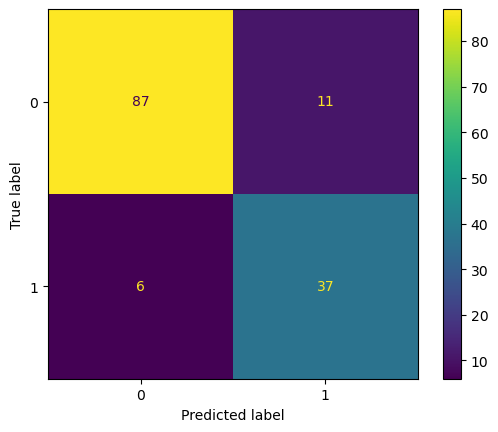

In [18]:
# Matriz confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

### XGBoost

In [19]:
# Otimizando hiperparâmetros
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
model = XGBClassifier(scale_pos_weight=scale_pos_weight)

parameters = {
	'n_estimators': [100, 200, 300], 
	'learning_rate': [0.01, 0.1], 
	'max_depth': [8, 9, 10], 
	'subsample': [0.7, 0.8, 0.9],
	'min_child_weight': [5],
	'random_state': [30, 42]
}

grid_search = GridSearchCV(model, parameters, cv=skf, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200, 'random_state': 30, 'subsample': 0.7}


In [20]:
# Treinando o modelo
xgboost = XGBClassifier(
  scale_pos_weight=scale_pos_weight,
  n_estimators=200, 
  learning_rate=0.1, 
  max_depth=8, 
  subsample=0.7,
  min_child_weight=5,
  random_state=30
)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

# Acurácia
print("\nAcurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Calcular a Curva ROC
y_prob = xgboost.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Área sob a Curva ROC: ", roc_auc)

scores = cross_val_score(xgboost, X, y, cv=skf, scoring="f1")
print("\nF1-Score médio na validação cruzada:", scores.mean())

scores = cross_val_score(xgboost, X, y, cv=skf, scoring="precision")
print("\nPrecisão média na validação cruzada:", scores.mean())

scores = cross_val_score(xgboost, X, y, cv=skf, scoring="recall")
print("\nRecall médio na validação cruzada:", scores.mean())


Acurácia: 0.9716312056737588

Relatório de Classificação:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.91      1.00      0.96        43

    accuracy                           0.97       141
   macro avg       0.96      0.98      0.97       141
weighted avg       0.97      0.97      0.97       141

Área sob a Curva ROC:  0.9997626957759849

F1-Score médio na validação cruzada: 0.9692905584311313

Precisão média na validação cruzada: 0.940475297060663

Recall médio na validação cruzada: 1.0


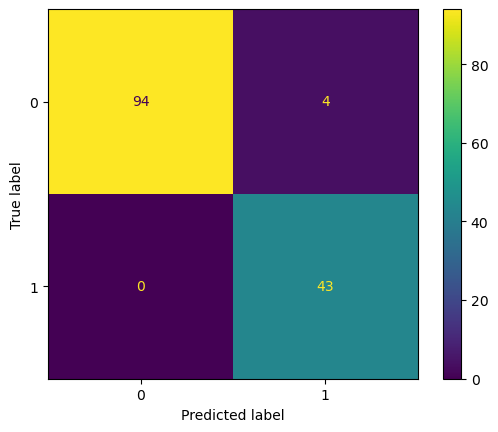

In [21]:
# Matriz confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

### Random Forest

In [ ]:
# Otimizando os hiperparâmetros
model = RandomForestClassifier(class_weight={0: peso_classe_0, 1: peso_classe_1})

parameters = {
	'n_estimators': [100, 200, 300],
	'criterion': ["gini", "entropy"],
	'max_depth': [8, 9, 10],
	'max_features': ["sqrt", "log2"],
	'min_samples_split': [4, 5, 6],
	'min_samples_leaf': [4, 5, 6],
  'random_state': [30, 42]
}

grid_search = GridSearchCV(model, parameters, cv=skf, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

In [23]:
# Treinando o modelo
rf = RandomForestClassifier(
  class_weight={0: peso_classe_0, 1: peso_classe_1},
  n_estimators=200,
  criterion="entropy",
  max_features="sqrt",
  min_samples_split=4,
  min_samples_leaf=4, 
  max_depth=8,
  random_state=30
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Acurácia
print("\nAcurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Calcular a Curva ROC
y_prob = rf.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Área sob a Curva ROC: ", roc_auc)

scores = cross_val_score(rf, X, y, cv=skf, scoring="f1")
print("\nF1-Score médio na validação cruzada:", scores.mean())

scores = cross_val_score(rf, X, y, cv=skf, scoring="precision")
print("\nPrecisão média na validação cruzada:", scores.mean())

scores = cross_val_score(rf, X, y, cv=skf, scoring="recall")
print("\nRecall médio na validação cruzada:", scores.mean())


Acurácia: 0.9574468085106383

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        98
           1       0.89      0.98      0.93        43

    accuracy                           0.96       141
   macro avg       0.94      0.96      0.95       141
weighted avg       0.96      0.96      0.96       141

Área sob a Curva ROC:  0.9907451352634077

F1-Score médio na validação cruzada: 0.9134607778510218

Precisão média na validação cruzada: 0.8744881244881245

Recall médio na validação cruzada: 0.9571834992887626


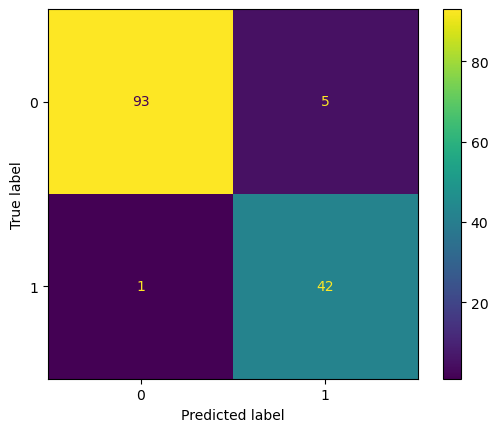

In [24]:
# Matriz confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

# Classificando os resultados

A01: 0.0915
A02: 0.0334
A03: 0.0600
A04: 0.0804
A05: 0.1613
A06: 0.1130
A07: 0.0394
A08: 0.0423
A09: 0.2102
A10: 0.0506
idade: 0.0091
gênero: 0.0114
icterícia: 0.0000
histórico_familiar: 0.0972


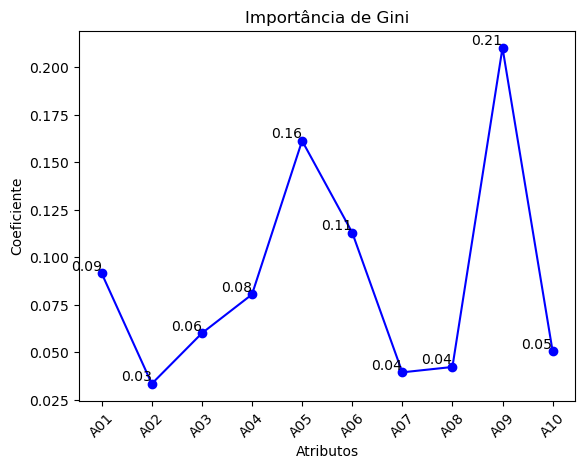

In [26]:
# Definindo quais features mais contribuem para a predição correta
importances = xgboost.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")
    
colunas_desejadas = [ 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10' ]

importancias_filtradas = [importances[X.columns.get_loc(col)] for col in colunas_desejadas]

plt.plot(colunas_desejadas, importancias_filtradas, marker='o', linestyle='-', color='b', )

for i, txt in enumerate(importancias_filtradas):
    plt.text(colunas_desejadas[i], importancias_filtradas[i], f'{txt:.2f}', ha='right', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.xlabel('Atributos')
plt.ylabel('Coeficiente')
plt.title('Importância de Gini')
plt.show()